In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json
import glob
import json
import re

plot_data = {}

top1, top5 = [], []
for b in range(2, 16):
    path = f'/workspace/Weight_compression/hf_model_comp_results/RTN/clip/clip_L_14_W{b}g128_result.json'
    with open(path, 'r') as f:
        data = json.load(f)
        top1.append(data['iamagenet'][0])
        top5.append(data['iamagenet'][1])
        
print(top1)
print(top5)

# plot_data['RTN'] = {'top1': top1, 'top5': top5}
# plot_data['RTN']['bit'] = range(2, 16)

top1, top5 = [], []
for b in range(2, 7):
    path = f'/workspace/Weight_compression/hf_model_comp/qtip/hf/clip-vit-large-patch14_{b}bit_result.json'
    with open(path, 'r') as f:
        data = json.load(f)
        top1.append(data['iamagenet'][0])
        top5.append(data['iamagenet'][1])
        
print(top1)
print(top5)

plot_data['QTIP'] = {'top1': top1, 'top5': top5}
plot_data['QTIP']['bit'] = range(2, 7)

FileNotFoundError: [Errno 2] No such file or directory: '/workspace/Weight_compression/hf_model_comp_results/RTN/clip/clip_L_14_W2g128_result.json'

In [ ]:
path = '/workspace/Weight_compression/hf_model_comp/comp_qtip/hf/clip_ql_llama_clip_ft/openai--clip-vit-large-patch14'
listdir = glob.glob(f'{path}/*result.json')
print(listdir[:1])
top1, top5 = [], []
bpp_loss = []
for file in listdir:
    # bit = re.search(r'w(\d+)', file.lower()).group(1)
    with open(file, 'r') as f:
        results = json.load(f)
        bpp_loss.append(results['bpp_loss'])
        top1.append(results['ppl']['imagenet'][0])
        top5.append(results['ppl']['imagenet'][0])
sorted_indices = sorted(range(len(bpp_loss)), key=lambda i: bpp_loss[i])
bpp_loss = [bpp_loss[i] for i in sorted_indices]
top1 = [top1[i] for i in sorted_indices]
top5 = [top5[i] for i in sorted_indices]

print(bpp_loss)
print(top1)
print(top5)

plot_data['NWC_ql(llama-clip)'] = {'top1': top1, 'top5': top5}
plot_data['NWC_ql(llama-clip)']['bit'] = bpp_loss

['/workspace/Weight_compression/hf_model_comp/comp_qtip/hf/clip_ql_llama_clip_ft/openai--clip-vit-large-patch14/lmbda100_result.json']
[2.073611752773688, 2.637384383982113, 3.140202032841318, 3.9331321722769803, 4.764134526575807, 5.983628360882684, 6.315795167028742]
[0.20226, 0.53994, 0.6532, 0.6969, 0.70746, 0.7102, 0.70962]
[0.20226, 0.53994, 0.6532, 0.6969, 0.70746, 0.7102, 0.70962]


In [ ]:
bit =  [2.265098358234416, 2.63773999078487, 3.14076128270891, 3.93255517993193, 4.760257585261895, 5.964859002327854, 6.329915328400568]
top1 = [0.4159, 0.5724, 0.622, 0.6418, 0.70096, 0.7099, 0.71032]
top5 = [0.6751, 0.8336, 0.8625, 0.8754, 0.91016, 0.9141, 0.9147]
plot_data['NWC_ql(llama8b)'] = {'top1': top1, 'top5': top5}
plot_data['NWC_ql(llama8b)']['bit'] = bit

bit =  [2.27731001603248, 2.6495901989096873, 3.152618712526027, 3.9349989225547812]
top1 = [0.06828, 0.12124, 0.59872, 0.59522]
top5 = [0.15818, 0.26686, 0.84898, 0.84534]
plot_data['NWC_ql(clip)'] = {'top1': top1, 'top5': top5}
plot_data['NWC_ql(clip)']['bit'] = bit

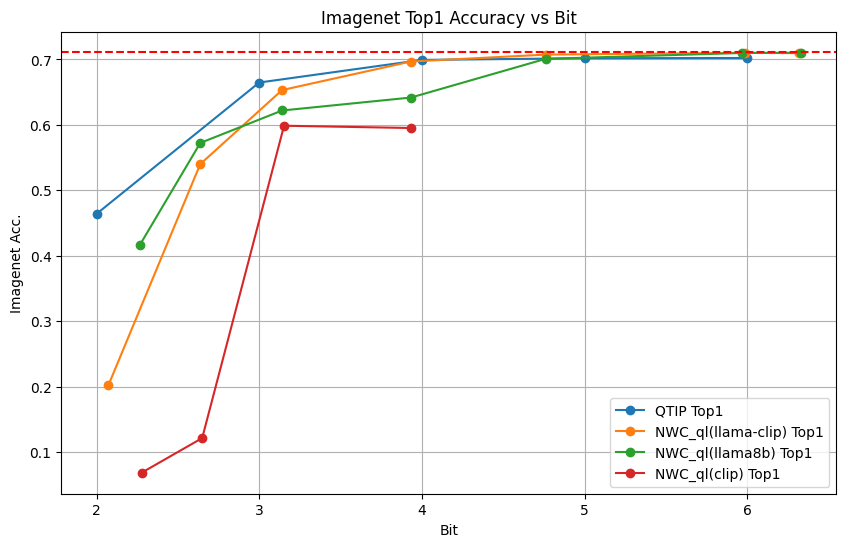

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Loop through the data dictionary and plot each model
for model, model_data in plot_data.items():
    ax.plot(model_data['bit'], model_data['top1'], label=f'{model} Top1', marker='o')
    # ax.plot(model_data['bit'], model_data['top5'], label=f'{model} Top5', marker='o')
# Labels and title
ax.set_xlabel('Bit')
ax.set_ylabel('Imagenet Acc.')
ax.legend()
# ax.set_ylim(0.695, None)
ax.axhline(y=0.7121, color='r', linestyle='--', label='Top1')
# ax.axhline(y=0.9149, color='r', linestyle='--', label='Top5')

ax.set_title('Imagenet Top1 Accuracy vs Bit')
# ax.set_ylim(0.69, 0.715)

plt.grid(True)
plt.show()

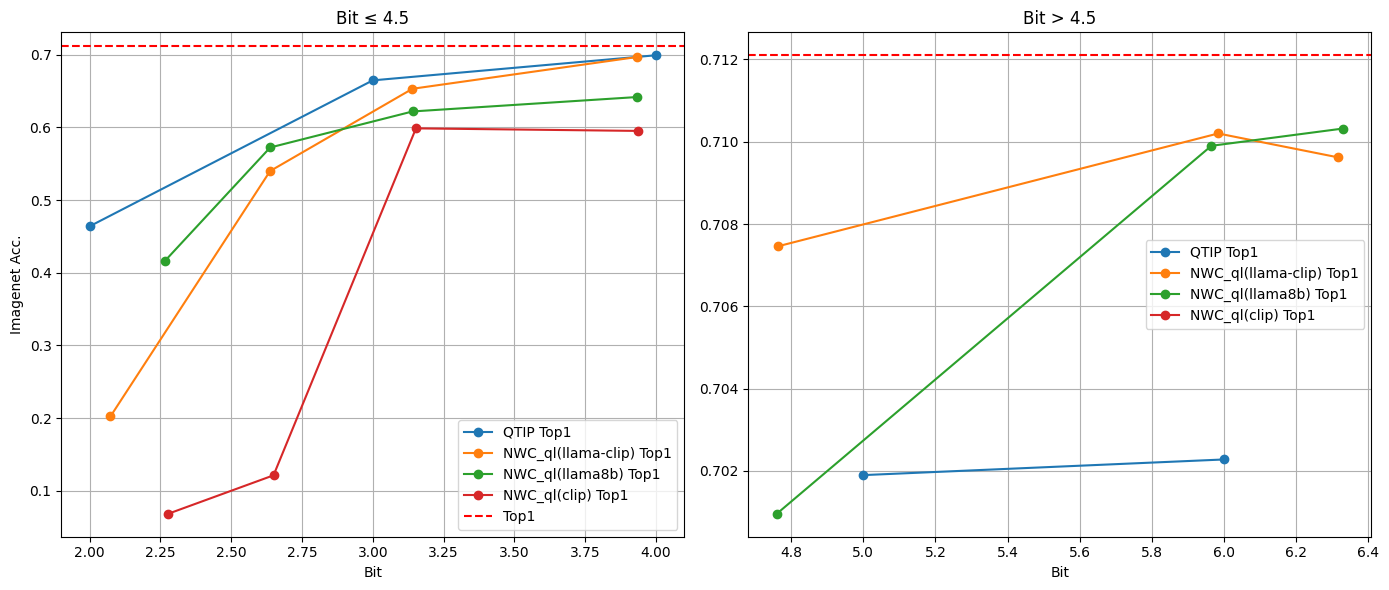

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# Plot 1: bit <= 4.5
for model, model_data in plot_data.items():
    bits = np.array(model_data['bit'])
    top1s = np.array(model_data['top1'])
    mask = bits <= 4.5
    ax1.plot(bits[mask], top1s[mask], label=f'{model} Top1', marker='o')

ax1.set_title('Bit ≤ 4.5')
ax1.set_xlabel('Bit')
ax1.set_ylabel('Imagenet Acc.')
ax1.axhline(y=0.7121, color='r', linestyle='--', label='Top1')
ax1.grid(True)
ax1.legend()

# Plot 2: bit > 4.5
for model, model_data in plot_data.items():
    bits = np.array(model_data['bit'])
    top1s = np.array(model_data['top1'])
    mask = bits > 4.5
    ax2.plot(bits[mask], top1s[mask], label=f'{model} Top1', marker='o')

ax2.set_title('Bit > 4.5')
ax2.set_xlabel('Bit')
ax2.axhline(y=0.7121, color='r', linestyle='--')
ax2.grid(True)
ax2.legend()
ax2.set_ylim(None, None)

plt.tight_layout()
plt.show()
